In [2]:
import importlib
import numpy as np
import market
importlib.reload(market)
import ipywidgets as widgets
import FinanceDataReader as fdr
from market import strong_stocks, get_ohlc, build_stock_price_db, update_stock_price_db

In [75]:
fdr.DataReader('000100', '2023')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,55223,55223,53691,53979,125708,-0.013992
2023-01-03,54170,54265,52447,53213,182911,-0.014191
2023-01-04,53499,53499,52447,52830,133108,-0.007197
2023-01-05,52830,52926,52448,52448,141199,-0.007231
2023-01-06,52352,52734,51969,52352,194451,-0.001830
...,...,...,...,...,...,...
2024-08-08,89200,90100,86900,88500,560303,-0.003378
2024-08-09,89800,90300,88200,88800,441331,0.003390
2024-08-12,89300,90100,85800,87300,783976,-0.016892


In [42]:
df = market.get_2days_prices('kosdaq')

In [14]:
df = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})
df.iloc[1:2]                   

,a,b
1,2,5


In [15]:
[3,1,9].index(9)

2

In [ ]:
df = get_ohlc(code=code, start_date=start_date.strftime('%Y-%m-%d'), end_date=last_date.strftime('%Y-%m-%d'))
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df_week = resample_df(df, period='W-FRI')[::-1]
if len(df_week) < week:
    continue
date = df_week[:week]["Low"].idxmin()        
lowest = df_week.loc[date, "Low"]
if lowest == 0:
    continue
currval = df["Close"].iloc[-1]
rate = (currval - lowest)/lowest*100

In [12]:
date_ = '2024-08-06'
df = pd.concat([market.get_2days_prices('kospi', date_), market.get_2days_prices('kosdaq', date_)], axis=0)
df = df.sort_values(["Code", "Date"])

df = df.groupby('Code').filter(lambda x: len(x)>1)

d1, d0 = df['Date'].unique()
df_today = df[df['Date']==d0].pipe(lambda x: x.assign(won_vol=lambda x: 0.5*(x['High'] + x['Low'])*x['Volume']))\
                            .sort_values('won_vol', ascending=False).iloc[:30, :].set_index("Code")

df_rate = df.groupby('Code')['Close'].apply(lambda x: 100*(x.values[1]-x.values[0])/x.values[0])\
                                    .rename('rate').to_frame()
df = df_today[['won_vol', 'Market', 'Volume']].join(df_rate['rate'])\
                    .sort_values('won_vol', ascending=False)[:30]\
                    .pipe(lambda x: x[x['rate'] >= 5]).reset_index(drop=False)    
# df['name'] = df['Code'].map(lambda x: krx.get_market_ticker_name(x))

In [10]:
df.groupby('Code')['Close'].size().pipe(lambda x: x[x==1])

Code
460470    1
Name: Close, dtype: int64

In [91]:

df = pd.concat([market.get_2days_prices('kospi'), market.get_2days_prices('kosdaq')], axis=0)
df = df.sort_values(["Code", "Date"])
d1, d0 = df['Date'].unique()
df_today = df[df['Date']==d0].pipe(lambda x: x.assign(won_vol=lambda x: 0.5*(x['High'] + x['Low'])*x['Volume']))\
                            .sort_values('won_vol', ascending=False).iloc[:30, :].set_index("Code")

df_rate = df.groupby('Code')['Close'].apply(lambda x: 100*(x.values[1]-x.values[0])/x.values[0])\
                                    .rename('rate').to_frame()
df = df_today[['won_vol', 'Market']].join(df_rate['rate'])\
                    .sort_values('won_vol', ascending=False)[:30]\
                    .pipe(lambda x: x[x['rate'] >= 5]).reset_index(drop=False)

df

,Code,won_vol,Market,rate
0,084650,5.402171e+11,kosdaq,20.741758
1,019170,1.710915e+11,kospi,13.076437
2,299660,1.633334e+11,kosdaq,29.951220
3,024840,1.301315e+11,kosdaq,13.729128
4,323280,1.169406e+11,kosdaq,29.945694
5,322000,1.168247e+11,kospi,30.000000


In [80]:
13320*14031310

186897049200

In [44]:
ks_rate, df = strong_stocks('kosdaq')
    

100%|██████████████████████████████████████████████████████████████████████████████| 1743/1743 [00:26<00:00, 65.41it/s]


In [42]:
df

,code,rate,marcap
194,051980,764.216054,1150071575040
559,196170,618.192628,16050855456000
360,089030,541.421947,1550176267500
667,257720,517.326057,2754513838500
623,232140,398.076923,1274984739000
...,...,...,...
149,042510,13.676732,107569672320
95,035610,13.676471,105692278405
160,044960,13.667426,63082996170
748,311690,13.664596,116731150620


In [32]:
a

<generator object update_stock_price_db at 0x000002357CB1AA70>

In [ ]:
kq_rate, df_kq = strong_stocks('kosdaq')

In [4]:
df_ks.query(f'40 < rate < 50 and marcap > 100000000000').shape

(28, 3)

In [5]:
df_ks

,code,rate,marcap
0,000100,72.810841,7282983011200
1,000105,33.024119,84673398000
2,000120,37.327824,2274390696800
3,000150,106.796117,2463703798500
4,000155,108.764045,371271319800
...,...,...,...
364,417310,19.261822,208868000000
365,432320,29.925926,444701639725
366,452260,20.040282,231080655120
367,460850,23.154362,219456135040


In [32]:
def next_stock(button):
    out.clear_output()
    with out:
        if not next_stock.initial:
            if button == button_next:
                next_stock.cnt += 1
                next_stock.cnt = np.clip(next_stock.cnt, 0, len(df_ks)-1)
            else:
                next_stock.cnt -= 1
                next_stock.cnt = np.clip(next_stock.cnt, 0, len(df_ks)-1)
        else:
            next_stock.initial = False
        print(df_ks.iloc[next_stock.cnt, :])        
next_stock.cnt = 0
next_stock.initial = True

button_next = widgets.Button(
    description='Next',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='',
    icon='caret-right' # (FontAwesome names without the `fa-` prefix)
)
button_next.on_click(next_stock)

button_prev = widgets.Button(
    description='Prev',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='',
    icon='caret-left' # (FontAwesome names without the `fa-` prefix)
)
button_prev.on_click(next_stock)

out = widgets.Output(layout={'border': '1px solid black'})
out.clear_output()
with out:
    print(df_ks.iloc[0, :])
        
out = widgets.Output(layout={'border': '1px solid black'})

In [33]:
buttons = widgets.HBox([button_prev, button_next])
ui = widgets.VBox([buttons, out])

In [34]:
display(ui)

In [69]:
import mplchart

mplchart.indicators.

In [68]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import ROC, SMA, EMA, RSI, MACD, ENV

ticker = 'AAPL'
prices = yf.Ticker(ticker).history('2y')

max_bars = 250

indicators = [
    Candlesticks(), SMA(50), SMA(200), Volume(),
    RSI(),
    MACD(),
]

# out = widgets.Output(layout={'border': '1px solid black'})
# with out:

ImportError: cannot import name 'ENV' from 'mplchart.indicators' (D:\Programs\miniconda3\Lib\site-packages\mplchart\indicators.py)

In [70]:
import mplfinance as mpf

ModuleNotFoundError: No module named 'mplfinance'

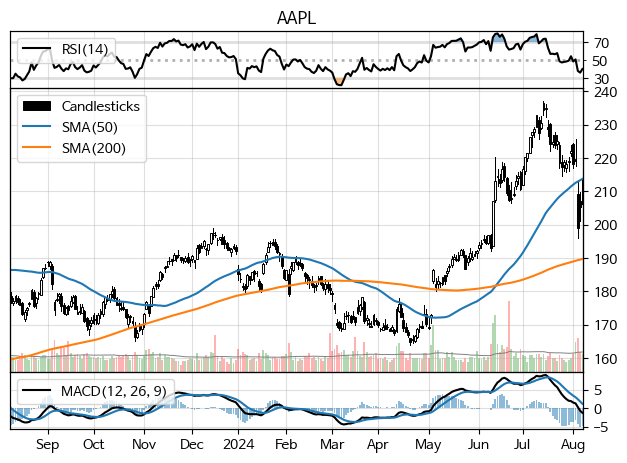

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

chart = Chart(title=ticker, max_bars=max_bars, figure=fig)
chart.plot(prices.iloc[:-2], indicators);


In [51]:
type(prices.index[0])

pandas._libs.tslibs.timestamps.Timestamp

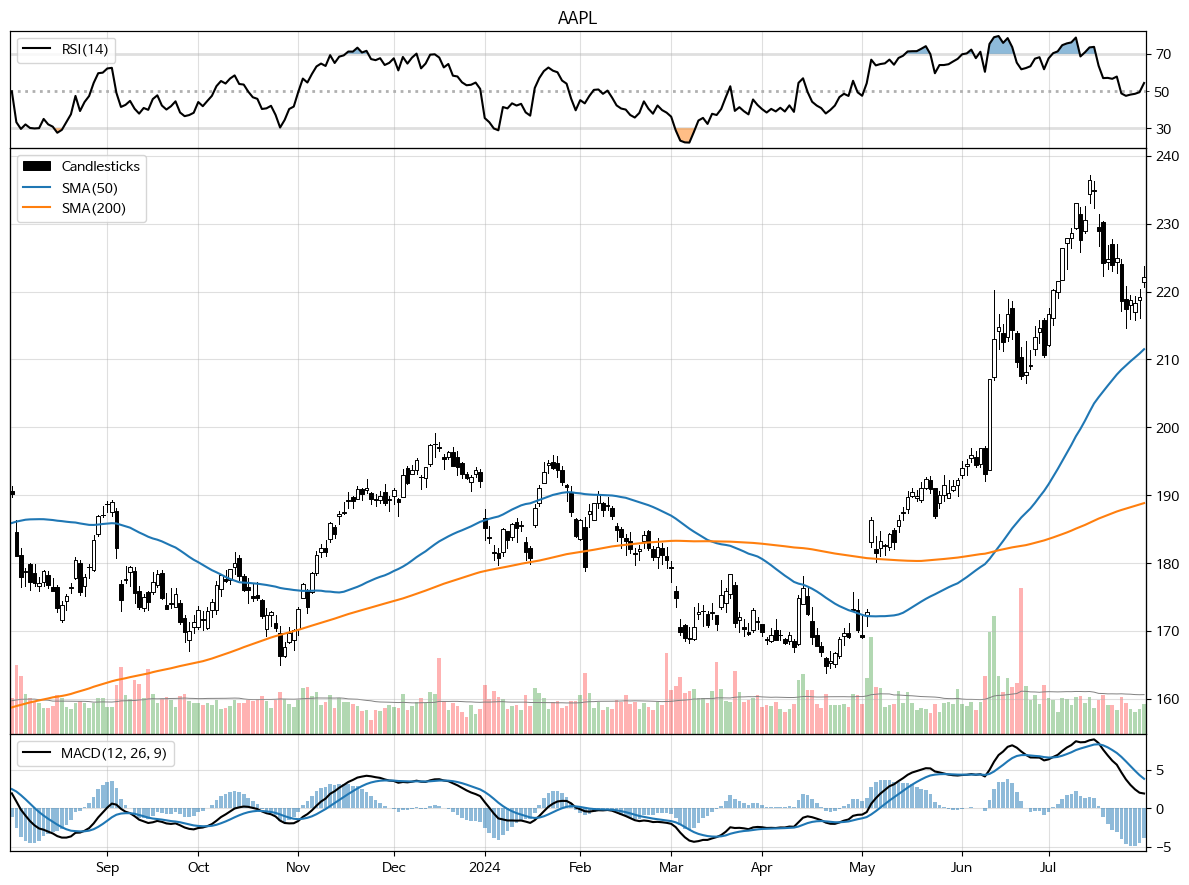

In [39]:
chart_div = widgets.Output(layout={'border': '1px solid black'})
with chart_div:
    chart = Chart(title=ticker, max_bars=max_bars)
    chart.plot(prices.iloc[:-2], indicators)

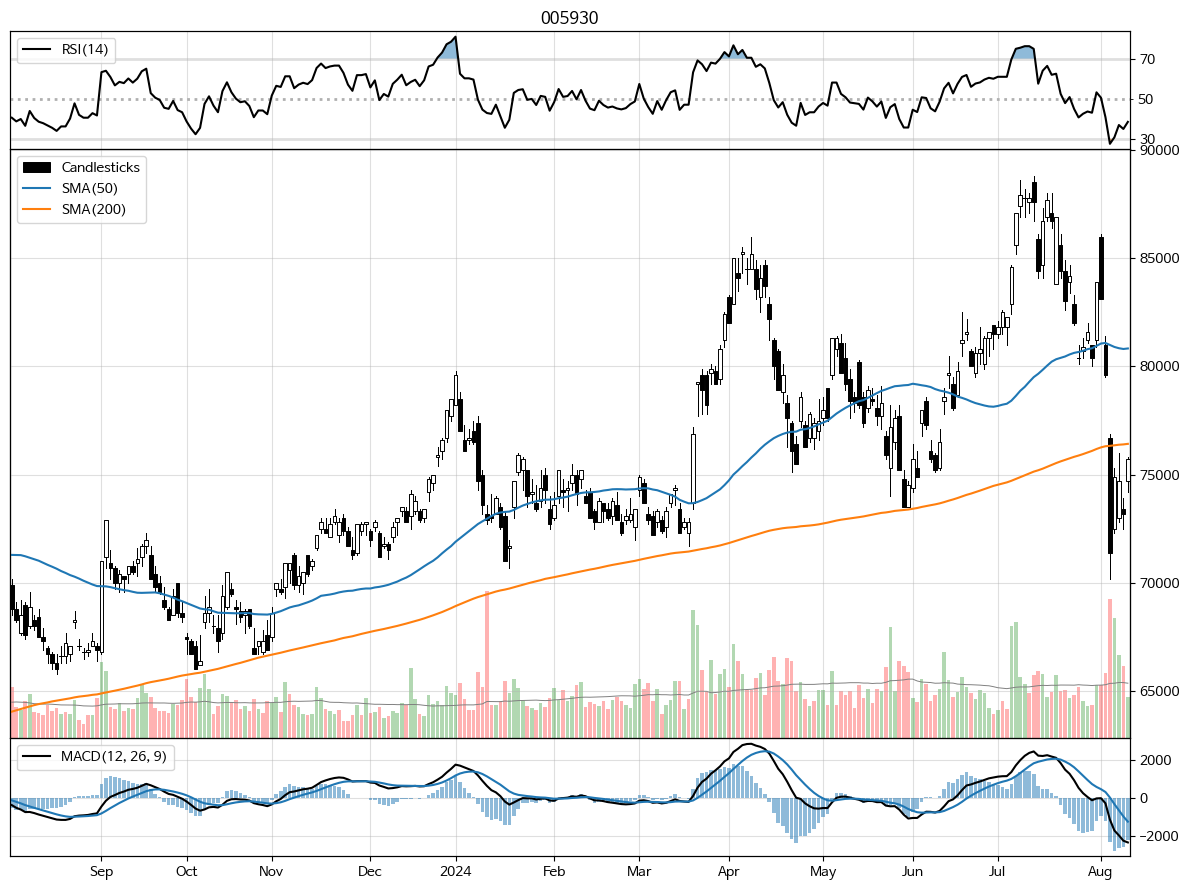

In [59]:
from datetime import timedelta, date 
code = '005930'
df = get_ohlc(code=code, end_date=(end_date:=date.today()), start_date=end_date-timedelta(days=365*2))
df = df[["Date", "Open", "High", "Low", "Close", "Volume"]]
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

chart = Chart(title=code, max_bars=max_bars)
chart.plot(df, indicators)

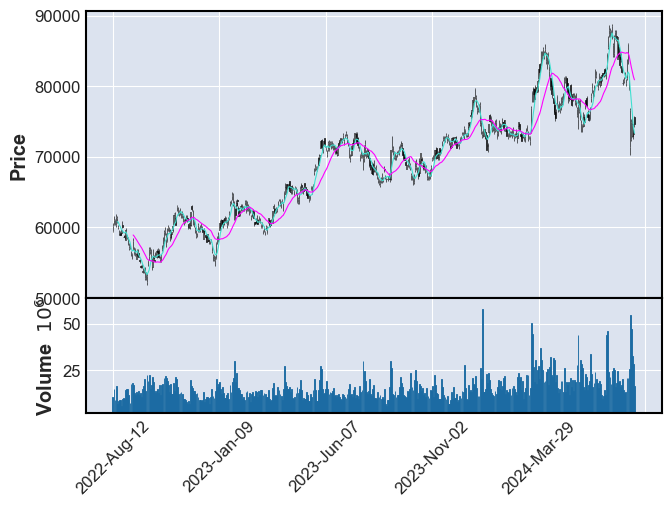

In [79]:
import mplfinance as mpf
   
aa = mpf.plot(df, type='candle', mav=(5,20), volume=True)

In [80]:
mpf.

In [ ]:
button_next = widgets.Button(
    description='Next',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='',
    icon='caret-right' # (FontAwesome names without the `fa-` prefix)
)
button_next.on_click(next_stock)

button_prev = widgets.Button(
    description='Prev',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='',
    icon='caret-left' # (FontAwesome names without the `fa-` prefix)
)
button_prev.on_click(next_stock)

In [48]:
prices.index

DatetimeIndex(['2022-08-03 00:00:00-04:00', '2022-08-04 00:00:00-04:00',
               '2022-08-05 00:00:00-04:00', '2022-08-08 00:00:00-04:00',
               '2022-08-09 00:00:00-04:00', '2022-08-10 00:00:00-04:00',
               '2022-08-11 00:00:00-04:00', '2022-08-12 00:00:00-04:00',
               '2022-08-15 00:00:00-04:00', '2022-08-16 00:00:00-04:00',
               ...
               '2024-07-22 00:00:00-04:00', '2024-07-23 00:00:00-04:00',
               '2024-07-24 00:00:00-04:00', '2024-07-25 00:00:00-04:00',
               '2024-07-26 00:00:00-04:00', '2024-07-29 00:00:00-04:00',
               '2024-07-30 00:00:00-04:00', '2024-07-31 00:00:00-04:00',
               '2024-08-01 00:00:00-04:00', '2024-08-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=503, freq=None)

In [50]:
from types import SimpleNamespace as sn

In [53]:
sn(**dict(a=1, b=2)).a

1

In [29]:
import sqlite3
from sqlite3 import Connection, Cursor, IntegrityError
import pandas as pd
from pykrx import stock as krx
import FinanceDataReader as fdr
from datetime import datetime, date, timedelta
DBFILE = 'stock_prices.db'

In [30]:
conn = sqlite3.connect(DBFILE)
curs = conn.cursor()

In [40]:
res = curs.execute("select MAX(date) from StockPrice where code='KS11'")
start_day = res.fetchone()[0]
start_day = datetime.strptime(start_day, "%Y-%m-%d") + timedelta(days=1)
start_day = start_day.strftime("%Y-%m-%d")
end_day = datetime.today().date().strftime("%Y-%m-%d")
start_day, end_day
# df = fdr.DataReader('KS11', start_day, end_day)

('2024-08-09', '2024-08-10')

datetime.datetime(2024, 8, 3, 0, 0)

In [41]:
df = fdr.DataReader('KS11', start_day, end_day)


1 001 2024-08-09 00:00:00 2026-08-08 00:00:00


In [43]:
len(df)

1

In [25]:
conn.close()

In [27]:
build_stock_price_db('2022-01-01','2024-08-08')

KS11:   0%|                                                                                      | 0/1 [00:00<?, ?it/s]

1 001 2022-01-01 00:00:00 2023-12-31 00:00:00
1 001 2024-01-01 00:00:00 2025-12-31 00:00:00


KQ11:   0%|                                                                                      | 0/1 [00:00<?, ?it/s]

2 001 2022-01-01 00:00:00 2023-12-31 00:00:00
2 001 2024-01-01 00:00:00 2025-12-31 00:00:00


KQ11: 100%|██████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.71it/s]


In [51]:
get_ohlc(code='005930')[::-1]

,Code,Market,Date,Open,High,Low,Close,Volume
641,005930,kospi,2024-08-09,75700.0,75800.0,74200.0,74700.0,16388222.0
640,005930,kospi,2024-08-08,73200.0,73900.0,72500.0,73400.0,28414729.0
639,005930,kospi,2024-08-07,73000.0,76000.0,72800.0,74700.0,32710428.0
638,005930,kospi,2024-08-06,74900.0,75300.0,72300.0,72500.0,47295226.0
637,005930,kospi,2024-08-05,76700.0,76900.0,70200.0,71400.0,54608790.0
...,...,...,...,...,...,...,...,...
4,005930,kospi,2022-01-07,78100.0,78400.0,77400.0,78300.0,15163757.0
3,005930,kospi,2022-01-06,76700.0,77600.0,76600.0,76900.0,12931954.0
2,005930,kospi,2022-01-05,78800.0,79000.0,76400.0,77400.0,25470640.0
1,005930,kospi,2022-01-04,78800.0,79200.0,78300.0,78700.0,12427416.0


In [49]:
conn.close()

In [67]:
52*5

260

In [82]:
from pykrx import stock as krx

krx.get_market_cap('2024-08-11')

D:\Programs\miniconda3\Lib\site-packages\pykrx\website\krx\market\wrap.py:188: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', 0)


,종가,시가총액,거래량,거래대금,상장주식수
티커,,,,,
060310,0,0,0,0,51084642
017370,0,0,0,0,18314054
221800,0,0,0,0,11287196
179900,0,0,0,0,16286895
263050,0,0,0,0,36798858
...,...,...,...,...,...
002410,0,0,0,0,24831982
382900,0,0,0,0,8761000
206400,0,0,0,0,31413500


In [88]:
rate, df = strong_stocks('kospi')

100%|████████████████████████████████████████████████████████████████████████████████| 957/957 [00:15<00:00, 63.39it/s]


In [89]:
df

,code,rate,marcap
422,267260,370.684039,10417622015000
85,003230,276.492772,4512275985000
412,229640,270.860927,857496612000
192,009470,238.074398,306550557000
220,012450,236.474501,15366205000000
...,...,...,...
247,016880,14.043035,80486569560
435,302440,13.991770,4256257350000
128,004960,13.961039,81226328040
299,042670,13.931889,1469081414080


In [93]:
df['code'].map(lambda x: krx.get_market_ticker_name(x))

422     HD현대일렉트릭
85          삼양식품
412      LS에코에너지
192         삼화전기
220    한화에어로스페이스
         ...    
247           웅진
435    SK바이오사이언스
128         한신공영
299    HD현대인프라코어
269         대원화성
Name: code, Length: 475, dtype: object

In [87]:
df

In [ ]:
krx.get_market_ticker_name(